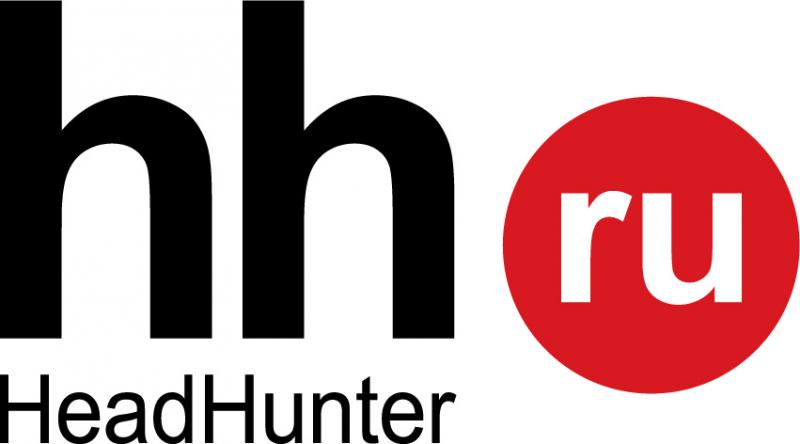

In [1]:
# импортируем нужные нам для работы библиотеки
import numpy as np 
import pandas as pd
!pip install plotly
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go  
import plotly.express as px

In [2]:
# Считываем файл, проверяем, что наши данные не повреждены
hh_data = pd.read_csv('C:\\Users\\Admin\\Desktop\\DataFrames\\hh_data.csv', delimiter=';')
hh_data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


# ИССЛЕДОВАНИЕ И ПРЕОБРАЗОВАНИЕ ДАННЫХ

In [3]:
#Размерность данных
hh_data.shape

(44744, 12)

In [4]:
#Получение общей информации о столбцах и строках датафрейма
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

Стоит отметить, что в данном датафрейме все признаки данных имеют тип object, для корректной работы модели машинного обучения в последующем, нам предстоит во многих признаках поменять тип данных. Также мы уже видим, что в одном столбце сосредоточена информация о нескольких признаках, чего быть не должно, что мы должны исправить создав новые признаки. 

In [5]:
hh_data['Авто'] = hh_data['Авто'].apply(lambda x: np.nan if x == 'Не указано' else x) 

In [6]:
features_null_percent = hh_data.isnull().mean() * 100
features_with_null = features_null_percent[features_null_percent>0].sort_values(ascending=False)
display(features_with_null)

Авто                               72.116932
Опыт работы                         0.375469
Последняя/нынешняя должность        0.004470
Последнее/нынешнее место работы     0.002235
dtype: float64

Понаблюдав за датафремом, можно сразу сделать вывод, что столбец "Авто" не несет никакой полезной информации, поэтому будет логичнее от него сразу избавиться. Мы можем также наблюдать незначительные пропуски в трех столбцах указанных выше.

In [7]:
# Мы специально избавляемся от ненужного столбца, поскольку, при обучении модели он не принисет нам никакой пользы, 
# а только наоборот может внести неточность в ее предсказания
hh_data = hh_data.drop('Авто', axis=1)

In [8]:
# Здесь мы наблюдаем топ-5 самых популярных должностей, которые ищут люди на сайте HH.RU
hh_data['Ищет работу на должность:'].value_counts(normalize=True)

Системный администратор                                                  0.069261
Инженер                                                                  0.021589
Аналитик                                                                 0.018081
Менеджер проектов                                                        0.016650
Руководитель проекта                                                     0.016047
                                                                           ...   
Системный администратор Linux, DevOps, Разработчик Golang                0.000022
Инженер КИПиА,инженер АСУТП ,видеоинженер                                0.000022
SEO-специалист | Специалист по интернет-рекламе | Интернет-маркетолог    0.000022
Специалист технических систем безопастности                              0.000022
Аналитик данных, Математик                                               0.000022
Name: Ищет работу на должность:, Length: 14929, dtype: float64

In [9]:
# Функция преобразования признака образования
def get_education(arg):
    arg = ' '.join(arg.split(' ')[0:3])
    if 'Высшее' in arg:
        return 'Высшее'
    elif 'Неоконченное высшее' in arg:
        return 'Неоконченное высшее'
    elif 'Среднее специальное' in arg:
        return 'Среднее специальное'
    elif 'Среднее образование' in arg:
        return 'Среднее'

hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(get_education)
hh_data = hh_data.drop('Образование и ВУЗ', axis=1)

Таким образом, мы избавились от лишней нагруженности ненужной информации в признаке "Образование и ВУЗ" и удалили его, оставив только уровень образования. Это поможет нам в дальнейшей работе по выялению зависимостей в данных, построению графиков и обучению модели 

In [10]:
# Функция преобразования признака пола.
def get_sex(arg):
    arg = ' '.join(arg.split(' ')[0:2])
    if 'Мужчина' in arg:
        return 'М'
    else:
        return 'Ж'
# Функция преобразования признака возраста.
def get_age(arg):
    keywords = ['год', 'года', 'лет']
    arg = ' '.join(arg.split(',')[1:2])
    for i in keywords:
        if i in arg:
            return arg[2:5]

In [11]:
hh_data['Пол'] = hh_data['Пол, возраст'].apply(get_sex)
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(get_age)
hh_data['Возраст'] = hh_data['Возраст'].astype('int8')
hh_data = hh_data.drop('Пол, возраст', axis=1)
hh_data.head()

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Среднее специальное,Ж,36
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Высшее,М,38
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Высшее,Ж,26


Благодаря двум функциям, представленным выше, мы смогли сделать наш датафрейм более гибким, как и с признаком "Образование и ВУЗ", мы избавились от лишней информации и того, что один столбец содержал объем информации, который должен быть распределен  по нескольким столбцам, что мы и сделали создав новые признаки - 'Пол' и 'Возраст'. 

In [12]:
hh_data['Возраст'].mean()
hh_data['Пол'].value_counts(normalize=True)
hh_data['Опыт работы'] = hh_data['Опыт работы'].apply(lambda x: np.nan if x == 'Не указано' else x)

In [13]:
#Преобразуем признак «Опыт работы».
def get_work_experience(arg):
    if arg is np.nan:
        return None
    month_keywords = ['месяц', 'месяцев', 'месяца']
    year_keywords = ['год', 'лет', 'года']
    args_splited = arg.split(' ')[:7]
    month = 0
    year = 0
    for index, item in enumerate(args_splited):
        if item in month_keywords:
            month = int(args_splited[index-1])
        if item in year_keywords:
            year = int(args_splited[index-1])
    return int(year*12 + month)

hh_data['Опыт работы кандидата'] = hh_data['Опыт работы'].apply(get_work_experience)
hh_data = hh_data.drop('Опыт работы', axis=1)
hh_data['Опыт работы кандидата'].median()

100.0

In [14]:
# Преобразуем признак «Город, переезд, командировки» с помощью функций, 
# представленных ниже и затем удалим его из таблицы

def get_city(arg):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    arg = ' '.join(arg.split(',')[0:1])
    for i in million_cities:
        if i in arg:
            return 'Город-миллионник'
    if 'Москва' in arg:
        return 'Москва'
    elif 'Санкт-Петербург' in arg:
        return 'Санкт-Петербург'
    else:
        return 'Другие'

def get_relocate(arg):
    arg = arg.split(' , ')
    if ('не готов к переезду' in arg[1:3]) or ('не готова к переезду' in arg[1:3]): 
        return False
    else: 
        return True

def get_business_trip(arg):
    arg = arg.split(' , ')
    if ('не готов к командировкам' in arg[-1]) or ('не готова к командировкам' in arg[-1]): 
        return False
    else: 
        return True

hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_relocate)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(get_business_trip)
hh_data['Город'].value_counts(normalize=True)

Москва              0.371469
Другие              0.353723
Город-миллионник    0.164469
Санкт-Петербург     0.110339
Name: Город, dtype: float64

In [15]:
hh_data[['Готовность к переезду', 'Готовность к командировкам']].value_counts(normalize=True)
hh_data = hh_data.drop('Город, переезд, командировки', axis=1)

С помощью преобразований, представленных выше, мы добавили три признака в датафрейм и смогли избавиться от огромной нагрузки информации, которая была до этого сосредоточена в одном признаке. Плюс ко всему мы получили столбцы с уже с другим типом данных (булевым). Это позволит проще работать при визуализации и обучении модели. Но впереди у нас есть еще такие признаки, которые содержат в себе объем информации, который можно разделить на несколько столбцов.

In [16]:
# Преобразование столбца "Занятость"

employment = []
for i in hh_data['Занятость']:
    time_at_work = i.split(', ')
    for e in time_at_work:
        if e not in employment:
            employment.append(e)

for j in employment:
    hh_data[j] = hh_data['Занятость'].apply(lambda x: j in x)

hh_data[['проектная работа', 'волонтерство']].value_counts()

проектная работа  волонтерство
False             False           36626
True              False            7632
                  True              436
False             True               50
dtype: int64

In [17]:
# Преобразование столбца "График"

charts = []
for i in hh_data['График']:
    schedule = i.split(', ')
    for e in schedule:
        if e not in charts:
            charts.append(e)

for chart in charts:
    hh_data[chart] = hh_data['График'].apply(lambda x: chart in x)

hh_data[['вахтовый метод', 'гибкий график']].value_counts()

вахтовый метод  гибкий график
False           False            28387
                True             13273
True            True              2311
                False              773
dtype: int64

In [18]:
hh_data = hh_data.drop(['Занятость', 'График'], axis=1)

С помощью алгоритмов, представленных выше, мы преобразовали признаки "График" и "Занятость. Мы могли бы реализовать этот алгоритм также как и это было с признаком "Город, готовность к переезду, готовность к командировкам", но в таком случае у нас бы получился бы очень громоздкий код, который выглядел бы не очень эстетично. Куда более лаконичным в данном случае будет воспользоваться вложенными циклами, которые добвляют уникальные ответы в отдельный список, который в дальнейшем будет названиями столбцов-мигалок.

In [ ]:
# Функция реализации признака заработной платы «ЗП»

exchange_rates = pd.read_csv('C:\\Users\\Admin\\Desktop\\DataFrames\\ExchangeRates.csv', sep=',')
currency= {
    'грн': 'UAH',
    'EUR':'EUR',
    'USD': 'USD',
    'белруб': 'BYN',
    'KGS': 'KGS',
    'KZT': 'KZT',
    'сум': 'UZS',
    'AZN': 'AZN'
}

hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True)
hh_data['Обновление резюме'] = hh_data['Обновление резюме'].dt.floor("D")
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], dayfirst=True)


def get_currency(arg):
    current_currency = arg.split(' ')[1]
    if current_currency in currency: 
        return currency[current_currency]
    return 'RUB'

def get_salary(arg):
    return int(arg.split(' ')[0])

In [ ]:
hh_data['Валюта'] = hh_data['ЗП'].apply(get_currency)
hh_data['Объем зарплаты'] = hh_data['ЗП'].apply(get_salary)
hh_data = hh_data.merge(exchange_rates, how='left', left_on=['Обновление резюме', 'Валюта'], 
                  right_on=['date', 'currency']).drop(['date', 'currency'], axis=1)

hh_data['close'] = hh_data['close'].fillna(1)
hh_data['proportion'] = hh_data['proportion'].fillna(1)
hh_data['ЗП (руб)'] = (hh_data['Объем зарплаты'] * hh_data['close'] / hh_data['proportion'])
hh_data = hh_data.drop(['Валюта', 'Объем зарплаты', 'close', 'proportion', 'ЗП', 'per', 'time', 'vol'], axis=1)

In [ ]:
hh_data.head()

# ИССЛЕДОВАНИЕ ЗАВИСИМОСТЕЙ В ДАННЫХ (EDA)

In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=hh_data['Возраст']),
              row=1, col=1)

fig.update_xaxes(title_text="Age", row=1, col=1)

fig.add_trace(go.Box(y=hh_data['Возраст']),
    row=1, col=2)

fig.update_yaxes(title_text="Age", row=1, col=2)

fig.update_layout(height=600, width=900, title_text="Распределение возраста кандидатов")
fig.show()
fig.write_html("C:\\Users\\Admin\\Desktop\\SkillFactory\\Plotly\\Age.html")

Графики сразу дают нам информацию о модальном значении признака, которое равно 30. На коробчатой диаграмме ярко видны аномалии, значения которых равн 100, 77 и 76. Трудно представить людей, которые бы имели желание работать в таком возрасте, поэтому эти данные можно считать выбросами. Большинство соискателей находятся в возрасте от 22 до 36 лет.

In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=hh_data['Опыт работы кандидата']),
              row=1, col=1)

fig.update_xaxes(title_text="work experience", row=1, col=1)

fig.add_trace(go.Box(y=hh_data['Опыт работы кандидата']),
    row=1, col=2)

fig.update_yaxes(title_text="work experience", row=1, col=2)

fig.update_layout(height=600, width=900, title_text="Распределение опыта работы кандидатов")
fig.show()
fig.write_html("C:\\Users\\Admin\\Desktop\\SkillFactory\\Plotly\\work_experience.html")

По данным графикам, мы можем проанализировать признак опыта работы кандидата (в месяцах). Минимальное значение - 1 месяц работы, модальное значение - 81.0 месяцев работы. Максимальное значение  - 1188 является явной аномалией и ухудшает качество нашего датафрейма. Разделив это значение на 12, мы поймем, что человек работал 99 лет, что в реальной жизни невозможно. Поэтому данная запись является выбросом. Большинство соискателей проработало от 57 до 154 месяцев.

In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(y=hh_data['ЗП (руб)']),
              row=1, col=1)

fig.update_xaxes(title_text="Salary", row=1, col=1)

fig.add_trace(go.Box(y=hh_data['ЗП (руб)']),
    row=1, col=2)

fig.update_yaxes(title_text="Salary", row=1, col=2)

fig.update_layout(height=600, width=900, title_text="Распределение заработной платы кандидатов")
fig.show()
fig.write_html("C:\\Users\\Admin\\Desktop\\SkillFactory\\Plotly\\Salary.html")

Модальное значение равняется пятидесяти тысячам рублей. Минимальное значение - 1 рубль, максимальное - 24 миллиона рублей. Большинство соискателей предпочли бы заработную плату в размере от 35 до 94 тысяч рублей. У нас также видны аномалии на графике - самая максимальная требуемая заработная плата составляет 24 миллиона рублей, что сильно искажает графики и в реальной жизни подобная заработная плата у работника является скорее воображаемой.

In [ ]:
mask = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby('Образование', as_index=False).median(numeric_only=True)

fig = px.bar(mask,
             title= "Зависимость признака заработной платы от уровня образования",
             x='Образование',
             y='ЗП (руб)',
             color='Образование',
             width=700,
             height=600)

fig.show()
fig.write_html("C:\\Users\\Admin\\Desktop\\SkillFactory\\Plotly\\education.html")

На данном графике, мы видим, что существует чувствительная разница между высшим и средним образование. У кандидатов с высшим образованием размер заработной платы на 33% больше, чем у кандидатов со средним или со средне-специальным образованием, а вот разницы между указанными двумя категориями образования в признаке оплаты труда нет. Судя по графику мы можем сделать вывод, что признак образования влияет на заработную плату работнику, но категории "среднее" и "среднее-специальное" имеют один и тот же показатель, возможно в дальнейшем мы можем объеденить эти две категории. 

In [ ]:
mask1 = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby('Город', as_index=False).median(numeric_only=True)
mask2 = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby('Город', as_index=False).max(numeric_only=True)


fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(y=mask1['ЗП (руб)'],
                     x=mask1['Город']),
              row=1, col=1)

fig.update_xaxes(title_text="Median", row=1, col=1)

fig.add_trace(go.Bar(y=mask2['ЗП (руб)'],
                     x=mask2['Город']),
    row=1, col=2)

fig.update_xaxes(title_text="Max", row=1, col=2)

fig.update_layout(height=600, width=900, title_text="Зависимость признака заработной платы от города")
fig.show()
fig.write_html("C:\\Users\\Admin\\Desktop\\SkillFactory\\Plotly\\City.html")

Если проанализировать графики, представленные выше можно сделать вывод, что признак города не имеет важное значение при прогнозировании заработной платы, поскольку максимальное значение мы наблюдаем у категории "другие", но вот ее медиана в сотни раз ниже, чем максимальное значение, что может "ввести в заблуждение" будущую модель. Тем более, в датафрейме есть признак "удаленная работа", это означает, что работник может работать из одного города на фирму из другого. Поэтому данный признак не сыграет важной роли при обучении модели, возможно даже "навредит" ее точности.

In [ ]:
mask1 = hh_data.groupby(by=['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(y=mask1['ЗП (руб)'],
                     x=mask1['Готовность к переезду']),
              row=1, col=1)

fig.add_trace(go.Bar(y=mask1['ЗП (руб)'],
                     x=mask1['Готовность к командировкам']),
    row=1, col=2)

fig.update_xaxes(title_text="Готовность к переезду", row=1, col=1)
fig.update_xaxes(title_text="Готовность к командировкам", row=1, col=2)
fig.update_yaxes(title_text="Заработная плата", row=1, col=1)
fig.update_yaxes(title_text="Заработная плата", row=1, col=2)

fig.update_layout(height=600, width=900, title_text="Зависимость признака заработной платы от готовности к переезду, командировкам")
fig.show()
fig.write_html("C:\\Users\\Admin\\Desktop\\SkillFactory\\Plotly\\business_trip.html")

Здесь мы наблюдаем явную зависимость заработной платы от признака "Готовности к командировкам". На графике, данный признак чувствительно влияет на размер заработной платы работника, чего нельзя сказать по признаку "Готовность к переезду". Исходя из графика данного признака, можно сделать вывод, что "Готовность к переезду" практически не влияет на размер заработной платы работников.

In [ ]:
mask = hh_data.pivot_table(values='ЗП (руб)',
                           index='Образование',
                           columns='Возраст',
                           aggfunc='median')
fig = px.imshow(mask)
fig.update_layout(height=600, width=900, title_text="Зависимость признака заработной платы от возраста и образования работника")

fig.show()
fig.write_html("C:\\Users\\Admin\\Desktop\\SkillFactory\\Plotly\\Age_and_education.html")

По графику видно, что интенсивность роста заработной платы наибольшая у категории людей с высшим образованием, а вот наименьшая интенсивность роста заработной платы  у категорий "среднее специальное" и "среднее". 
Тепловая карта искажена данными о том, что кто-то желает найти работу в возрасте 100 и 77 лет, что физически невозможно. Скорее всего это выбросы, от которых мы избавимся на этапе очистки данных. Также мы можем затить пропуски в данных и аномалии, например, высшее образование в 14 лет, что тоже скорее всего является выбросом.

In [ ]:
df_copy = hh_data.copy()
df_copy['Опыт работы(год)'] = df_copy['Опыт работы кандидата'] / 12

fig1 = px.scatter(
    data_frame=df_copy,
    x = 'Возраст',
    y = 'Опыт работы(год)',
    color='Возраст',
    width=800,
    height=500,
    title='Зависимость опыта работы от возраста',
)
fig2 = px.line(df_copy, x=[0, 100], y=[0, 100])
fig = go.Figure(data = fig1.data + fig2.data)
fig.update_layout(height=600, width=900, title_text="Сравнение признаков опыта работы и возраста работников")
fig.update_xaxes(title_text="Возраст")
fig.update_yaxes(title_text="Опыт работы")

fig.show()
fig.write_html("C:\\Users\\Admin\\Desktop\\SkillFactory\\Plotly\\work_experience_and_age.html")

С помощью данного графика, мы можем точно определить, что в наших данных есть выбросы. Те точки, которые находятся выше линиии или на линии являются выбросами, поскольку невозможен физически опыт работы больше, чем количество лет работнику. Эти данные определенно негативным образом повлияют на нашу модель машинного обучения, в связи с чем нам следует от этих данных избавиться.

# ОЧИСТКА ДАННЫХ

In [ ]:
# Поиск дубликатов
dupl_columns = list(hh_data.columns)
mask = hh_data.duplicated(subset=dupl_columns)
hh_duplicates = hh_data[mask]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')
hh_data = hh_data.drop_duplicates(subset=dupl_columns)

In [ ]:
# Число пропусков в столбцах
colls_null_percent = hh_data.isnull().mean() * 100
cols_with_null = colls_null_percent[colls_null_percent>0].sort_values(ascending=False)
display(colls_null_percent)

In [ ]:
# Заполнение недостающих значений константами (медианными значениями) и удаление строк, где пропусков больше, чем 1
hh_data['Опыт работы кандидата'].fillna(value=hh_data['Опыт работы кандидата'].median())
hh_data = hh_data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

In [ ]:
# Удаляем строки, где заработная плата больше одного миллиона и меньше одной тысячи рублей 
outliers = hh_data[(hh_data['ЗП (руб)'] > 1e6) | (hh_data['ЗП (руб)'] < 1e3)]
hh_data = hh_data.drop(outliers.index)

In [ ]:
# Функция поиска выбросов с помощью метода Z-отклонений
def outliers_z_score(data, feature, log_scale=False):
    if log_scale == True:
        x = np.log(data[feature] +1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x<lower_bound) | (x>upper_bound)]
    cleaned_data = [(x>lower_bound) | (x<upper_bound)]
    return outliers

display(outliers_z_score(hh_data, 'Возраст', log_scale=False))

fig = px.histogram(hh_data, x = 'Возраст', title = 'Распределение возраста')
fig.add_shape(type = 'line',
                y0 = 0,
                x0 = hh_data['Возраст'].mean(),
                y1 = hh_data['Возраст'].value_counts().max(),
                x1 = hh_data['Возраст'].mean(),
                line = dict(color='Red'),
                )
fig.add_shape(type = 'line',
                y0 = 0,
                x0 = hh_data['Возраст'].mean() - 3 * hh_data['Возраст'].std(),
                y1 = hh_data['Возраст'].value_counts().max(),
                x1 = hh_data['Возраст'].mean() - 3 * hh_data['Возраст'].std(),
                line = dict(color='Green'),
                )
fig.add_shape(type = 'line',
                y0 = 0,
                x0 = hh_data['Возраст'].mean() + 4 * hh_data['Возраст'].std(),
                y1 = hh_data['Возраст'].value_counts().max(),
                x1 = hh_data['Возраст'].mean() + 4 * hh_data['Возраст'].std(),
                line = dict(color='Green'),
                )
fig.show();

Таким образом, мы провели огромную работу по преобразованию, исследованию и очистке данных. Теперь, мы можем обучать модель машинного обучения по нашему датасету, но, конечно, для корректной работы модели преобразований мало. Мы довольно мало провели исследований зависимостей данных, что нужно будет делать еще, чтобы сделать полезные выводы о пригодности признаков для дальнейшего обучения.  